In [2]:

import os
import pandas as pd
import arviz as az 
pd.options.mode.chained_assignment = None
import math
from scipy.stats import norm
import xarray
import matplotlib.pyplot as plt

In [31]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

In [7]:
#change working directory to where netCDF files are stored
#note: code for running model uses az.from_pystan to convert pystan fit into xarray dataset
#and then xarray dataset is exported as a netcdf file
os.chdir('nc_files')

In [65]:
#extract fit from netcdf file
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')
loss_basic_fit = az. from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')

In [10]:
standard_basic_fit

Inference data with groups:
	> posterior
	> sample_stats

In [25]:
uncued_basic_fit

Inference data with groups:
	> posterior
	> sample_stats

In [77]:
#print the posterior distributions for each group-level paramaeter 
standard_basic_fit.posterior.mu_pr

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 4)>
array([[[0.06336204, 0.04667348, 0.07766831, 0.39883123],
        [0.07015613, 0.04332451, 0.07032898, 0.39891518],
        [0.0573085 , 0.04922806, 0.05440927, 0.39884019],
        ...,
        [0.06051315, 0.04304876, 0.0509527 , 0.39885489],
        [0.0615477 , 0.04312274, 0.03392172, 0.39868227],
        [0.06359484, 0.04139513, 0.03133428, 0.3986527 ]],

       [[0.06119932, 0.05935927, 0.05282076, 0.39880205],
        [0.06330044, 0.05178392, 0.05201152, 0.39881433],
        [0.06204449, 0.05218201, 0.0873873 , 0.39889228],
        ...,
        [0.07374524, 0.04501262, 0.04591691, 0.39881795],
        [0.07557171, 0.03920807, 0.03608824, 0.39885571],
        [0.07930845, 0.04033467, 0.04036459, 0.39881139]],

       [[0.06610649, 0.06254502, 0.09127978, 0.39885182],
        [0.07075121, 0.04232843, 0.10938631, 0.39891699],
        [0.06648766, 0.04507727, 0.09849775, 0.39884883],
        ...,
        [0.07589677, 0.04827703, 0.10599748, 0.39891129],
        [0.06953484, 0.05418241, 0.06075475, 0.39884449],
        [0.06980917, 0.05394434, 0.06390949, 0.39884869]],

       [[0.06097719, 0.05096778, 0.06583313, 0.39886741],
        [0.06258418, 0.05355855, 0.08171557, 0.39880831],
        [0.05814872, 0.056653  , 0.07566943, 0.39876839],
        ...,
        [0.06188543, 0.05343386, 0.06480905, 0.39894156],
        [0.06279494, 0.05046695, 0.0616391 , 0.39884388],
        [0.06283723, 0.04364174, 0.06069745, 0.39887931]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3

In [26]:
uncued_basic_fit.posterior.mu_pr

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 4)>
array([[[-1.509723, -2.401326, -1.511898,  0.029564],
        [-1.671181, -2.286256, -1.388097,  0.020082],
        ...,
        [-1.544192, -2.377212, -1.889349,  0.037092],
        [-1.569644, -2.393245, -1.931448,  0.039329]],

       [[-1.595073, -2.373073, -1.650282,  0.012738],
        [-1.354704, -2.532652, -1.601037,  0.014281],
        ...,
        [-1.30475 , -2.315303, -1.752403,  0.017045],
        [-1.626895, -2.432161, -1.63747 ,  0.021104]],

       [[-1.710771, -2.356389, -1.649932,  0.036324],
        [-1.645685, -2.393015, -1.696341,  0.061083],
        ...,
        [-1.613619, -2.320102, -1.529688,  0.02113 ],
        [-1.622863, -2.321453, -1.489366,  0.02228 ]],

       [[-1.347548, -2.200376, -1.586802,  0.015113],
        [-1.523315, -2.310747, -1.681228,  0.034169],
        ...,
        [-1.426364, -2.585811, -1.339534,  0.016923],
        [-1.581431, -2.203761, -1.578768,  0.01818 ]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3

In [39]:
#print just the values
standard_basic_fit.posterior.mu_pr.values

array([[[0.06336204, 0.04667348, 0.07766831, 0.39883123],
        [0.07015613, 0.04332451, 0.07032898, 0.39891518],
        [0.0573085 , 0.04922806, 0.05440927, 0.39884019],
        ...,
        [0.06051315, 0.04304876, 0.0509527 , 0.39885489],
        [0.0615477 , 0.04312274, 0.03392172, 0.39868227],
        [0.06359484, 0.04139513, 0.03133428, 0.3986527 ]],

       [[0.06119932, 0.05935927, 0.05282076, 0.39880205],
        [0.06330044, 0.05178392, 0.05201152, 0.39881433],
        [0.06204449, 0.05218201, 0.0873873 , 0.39889228],
        ...,
        [0.07374524, 0.04501262, 0.04591691, 0.39881795],
        [0.07557171, 0.03920807, 0.03608824, 0.39885571],
        [0.07930845, 0.04033467, 0.04036459, 0.39881139]],

       [[0.06610649, 0.06254502, 0.09127978, 0.39885182],
        [0.07075121, 0.04232843, 0.10938631, 0.39891699],
        [0.06648766, 0.04507727, 0.09849775, 0.39884883],
        ...,
        [0.07589677, 0.04827703, 0.10599748, 0.39891129],
        [0.06953484, 0.054182

array([[<AxesSubplot:title={'center':'mu_pr\n0'}>,
        <AxesSubplot:title={'center':'mu_pr\n0'}>],
       [<AxesSubplot:title={'center':'mu_pr\n1'}>,
        <AxesSubplot:title={'center':'mu_pr\n1'}>],
       [<AxesSubplot:title={'center':'mu_pr\n2'}>,
        <AxesSubplot:title={'center':'mu_pr\n2'}>],
       [<AxesSubplot:title={'center':'mu_pr\n3'}>,
        <AxesSubplot:title={'center':'mu_pr\n3'}>]], dtype=object)

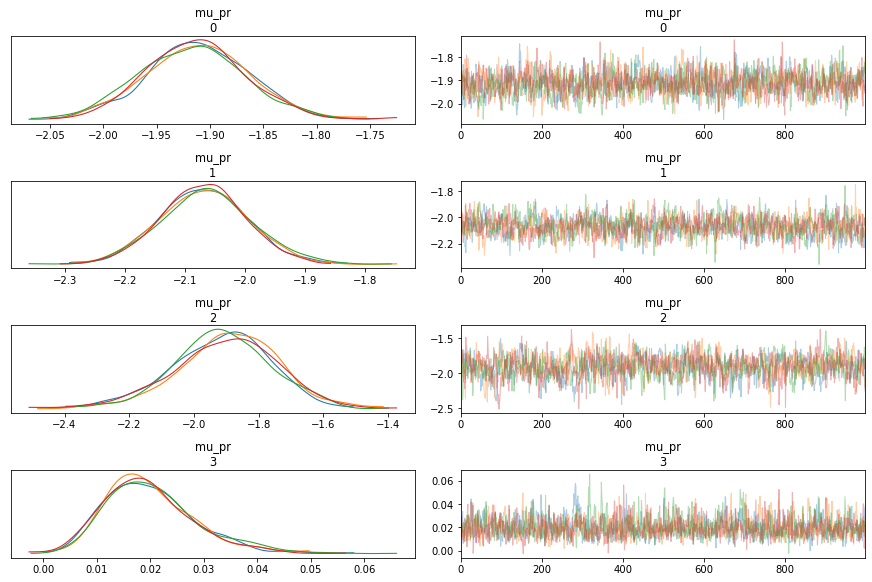

In [16]:
#extract posterior distribution for each group level parameter and plot them

#figures on left == posterior distribution for each of the chains --> should all overlap
# figures on right == trace plot for all four chains
# trace plot is a graph of the sampled parameter values as a function of the step in the chain 

az.plot_trace(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2,3]})

array([[<AxesSubplot:title={'center':'mu_pr\n0'}>,
        <AxesSubplot:title={'center':'mu_pr\n0'}>],
       [<AxesSubplot:title={'center':'mu_pr\n1'}>,
        <AxesSubplot:title={'center':'mu_pr\n1'}>],
       [<AxesSubplot:title={'center':'mu_pr\n2'}>,
        <AxesSubplot:title={'center':'mu_pr\n2'}>],
       [<AxesSubplot:title={'center':'mu_pr\n3'}>,
        <AxesSubplot:title={'center':'mu_pr\n3'}>]], dtype=object)

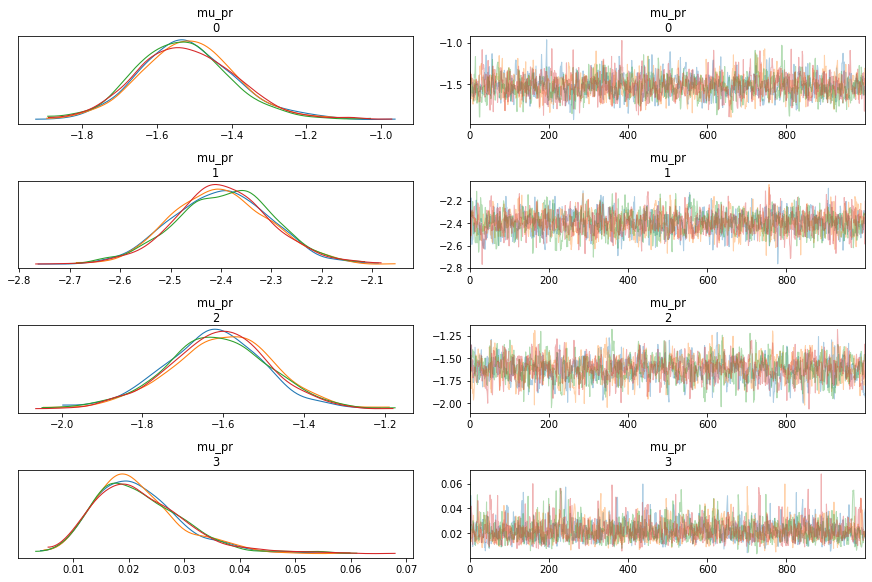

In [27]:
az.plot_trace(uncued_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2,3]})

In [82]:
#print summary statistics 
#xarray.set_options(display_max_rows=264)
az.summary(standard_basic_fit)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],0.064,0.006,0.054,0.076,0.000,0.000,1193.0,1193.0,1171.0,1902.0,1.01
mu_pr[1],0.047,0.007,0.034,0.061,0.000,0.000,886.0,886.0,885.0,1700.0,1.00
mu_pr[2],0.067,0.019,0.029,0.101,0.001,0.000,821.0,821.0,809.0,1242.0,1.00
mu_pr[3],0.399,0.000,0.399,0.399,0.000,0.000,1202.0,1202.0,1411.0,1440.0,1.00
sigma[0],0.182,0.038,0.112,0.251,0.001,0.001,1270.0,1270.0,1255.0,2037.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
m[27],0.021,0.021,-0.013,0.064,0.000,0.000,3170.0,2919.0,2966.0,2540.0,1.00
m[28],0.044,0.020,0.012,0.080,0.000,0.000,2371.0,2371.0,2445.0,2604.0,1.00
m[29],0.004,0.015,-0.014,0.033,0.000,0.000,1609.0,1609.0,2085.0,2190.0,1.00
m[30],0.012,0.014,-0.005,0.039,0.000,0.000,2154.0,2154.0,2473.0,2448.0,1.00


In [22]:
#can convert to pandas dataframe
#standard_basic_df = standard_basic_fit.to_dataframe()
#standard_basic_df.keys()

AttributeError: 'InferenceData' object has no attribute 'to_dataframe'

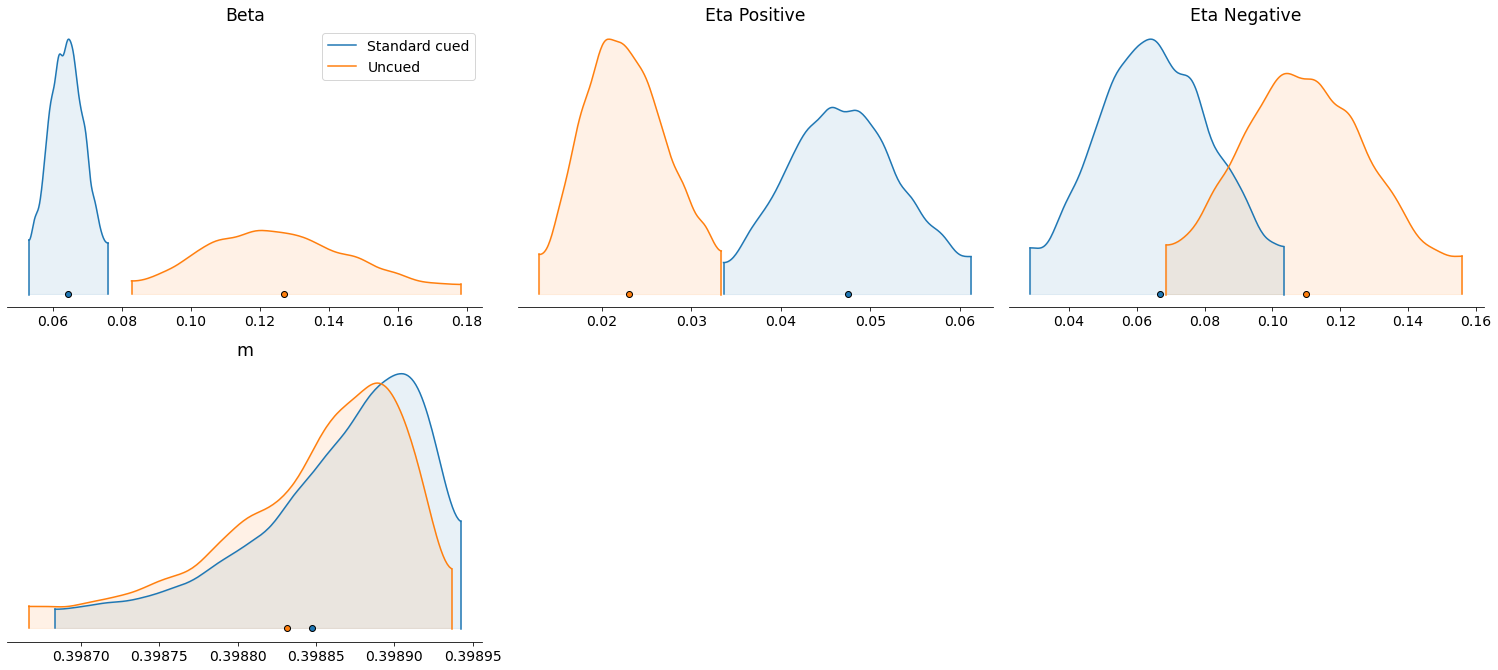

In [66]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([standard_basic_fit,uncued_basic_fit], var_names = 'mu_pr', 
                data_labels = ['Standard cued', 'Uncued'],
                shade = 0.1, 
                hdi_prob = 0.95,
                transform = transform1)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')


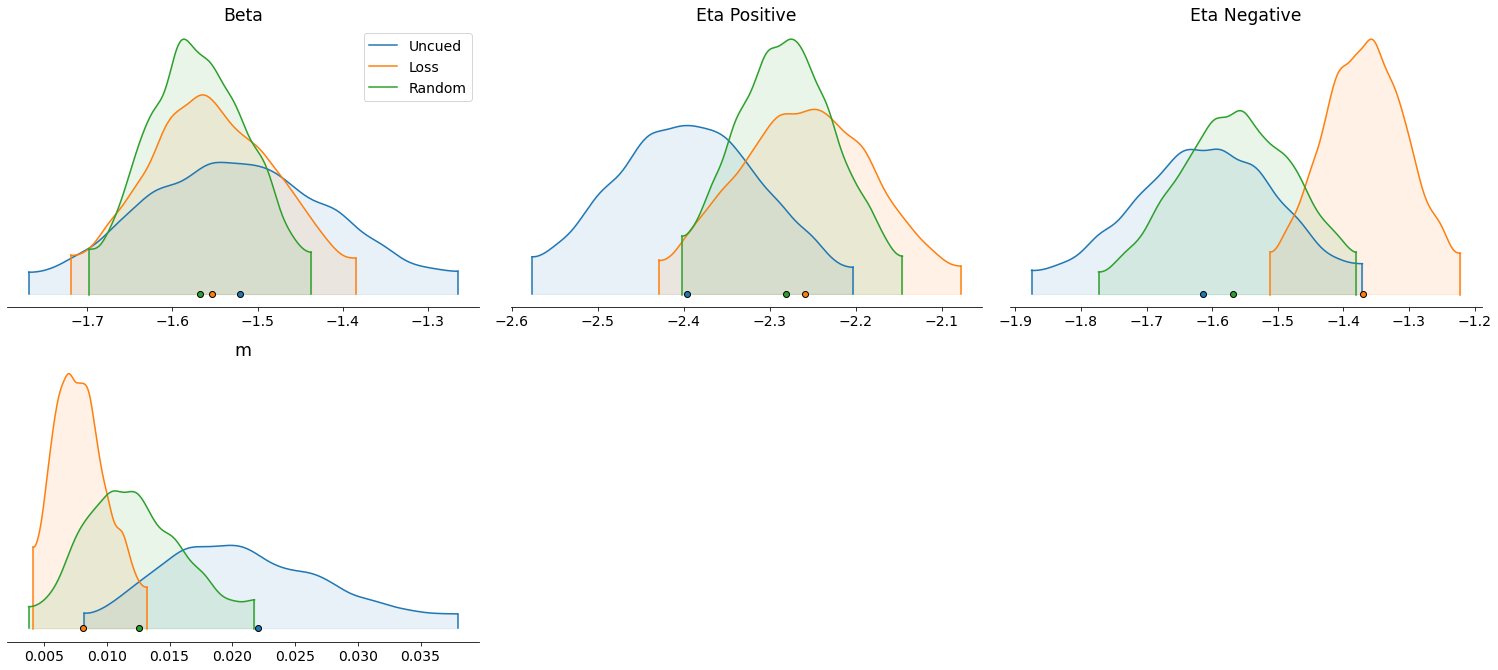

In [59]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([uncued_basic_fit,loss_basic_fit,random_basic_fit], var_names = 'mu_pr', 
                data_labels = ['Uncued', 'Loss', 'Random'],
                shade = 0.1, 
               hdi_prob = 0.95)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')


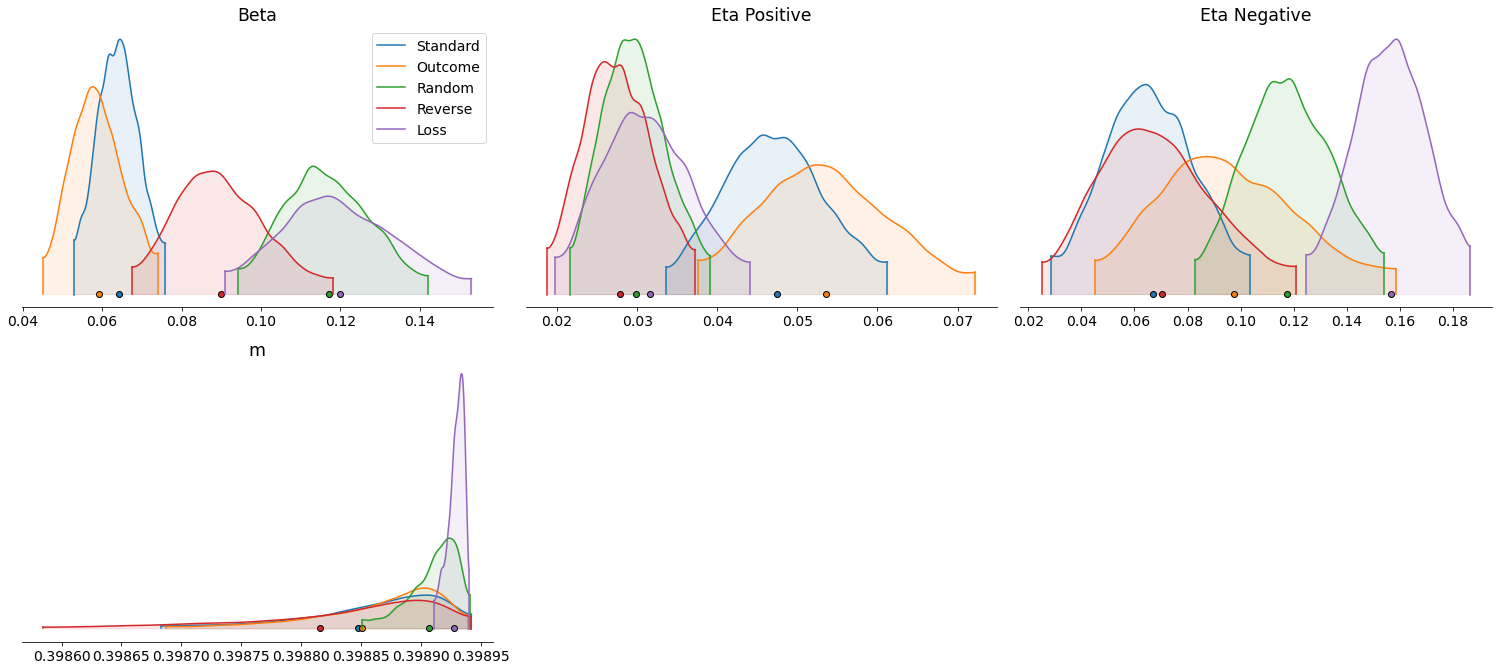

In [62]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([standard_basic_fit,outcome_basic_fit,random_basic_fit,reverse_basic_fit,loss_basic_fit], 
                var_names = 'mu_pr', 
                data_labels = ['Standard', 'Outcome','Random','Reverse','Loss'],
                shade = 0.1, 
                hdi_prob = 0.95,
                    transform = transform1)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

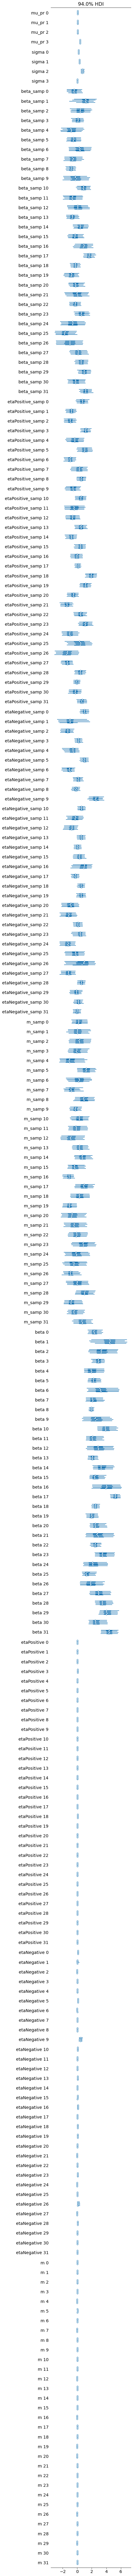

In [33]:
az.plot_forest(standard_basic_fit)

array([<AxesSubplot:xlabel='beta\n0'>, <AxesSubplot:xlabel='beta\n1'>,
       <AxesSubplot:xlabel='beta\n2'>, <AxesSubplot:xlabel='beta\n3'>,
       <AxesSubplot:xlabel='beta\n4'>, <AxesSubplot:xlabel='beta\n5'>,
       <AxesSubplot:xlabel='beta\n6'>, <AxesSubplot:xlabel='beta\n7'>,
       <AxesSubplot:xlabel='beta\n8'>, <AxesSubplot:xlabel='beta\n9'>,
       <AxesSubplot:xlabel='beta\n10'>, <AxesSubplot:xlabel='beta\n11'>,
       <AxesSubplot:xlabel='beta\n12'>, <AxesSubplot:xlabel='beta\n13'>,
       <AxesSubplot:xlabel='beta\n14'>, <AxesSubplot:xlabel='beta\n15'>,
       <AxesSubplot:xlabel='beta\n16'>, <AxesSubplot:xlabel='beta\n17'>,
       <AxesSubplot:xlabel='beta\n18'>, <AxesSubplot:xlabel='beta\n19'>,
       <AxesSubplot:xlabel='beta\n20'>, <AxesSubplot:xlabel='beta\n21'>,
       <AxesSubplot:xlabel='beta\n22'>, <AxesSubplot:xlabel='beta\n23'>,
       <AxesSubplot:xlabel='beta\n24'>, <AxesSubplot:xlabel='beta\n25'>,
       <AxesSubplot:xlabel='beta\n26'>, <AxesSubplot:xlabel='

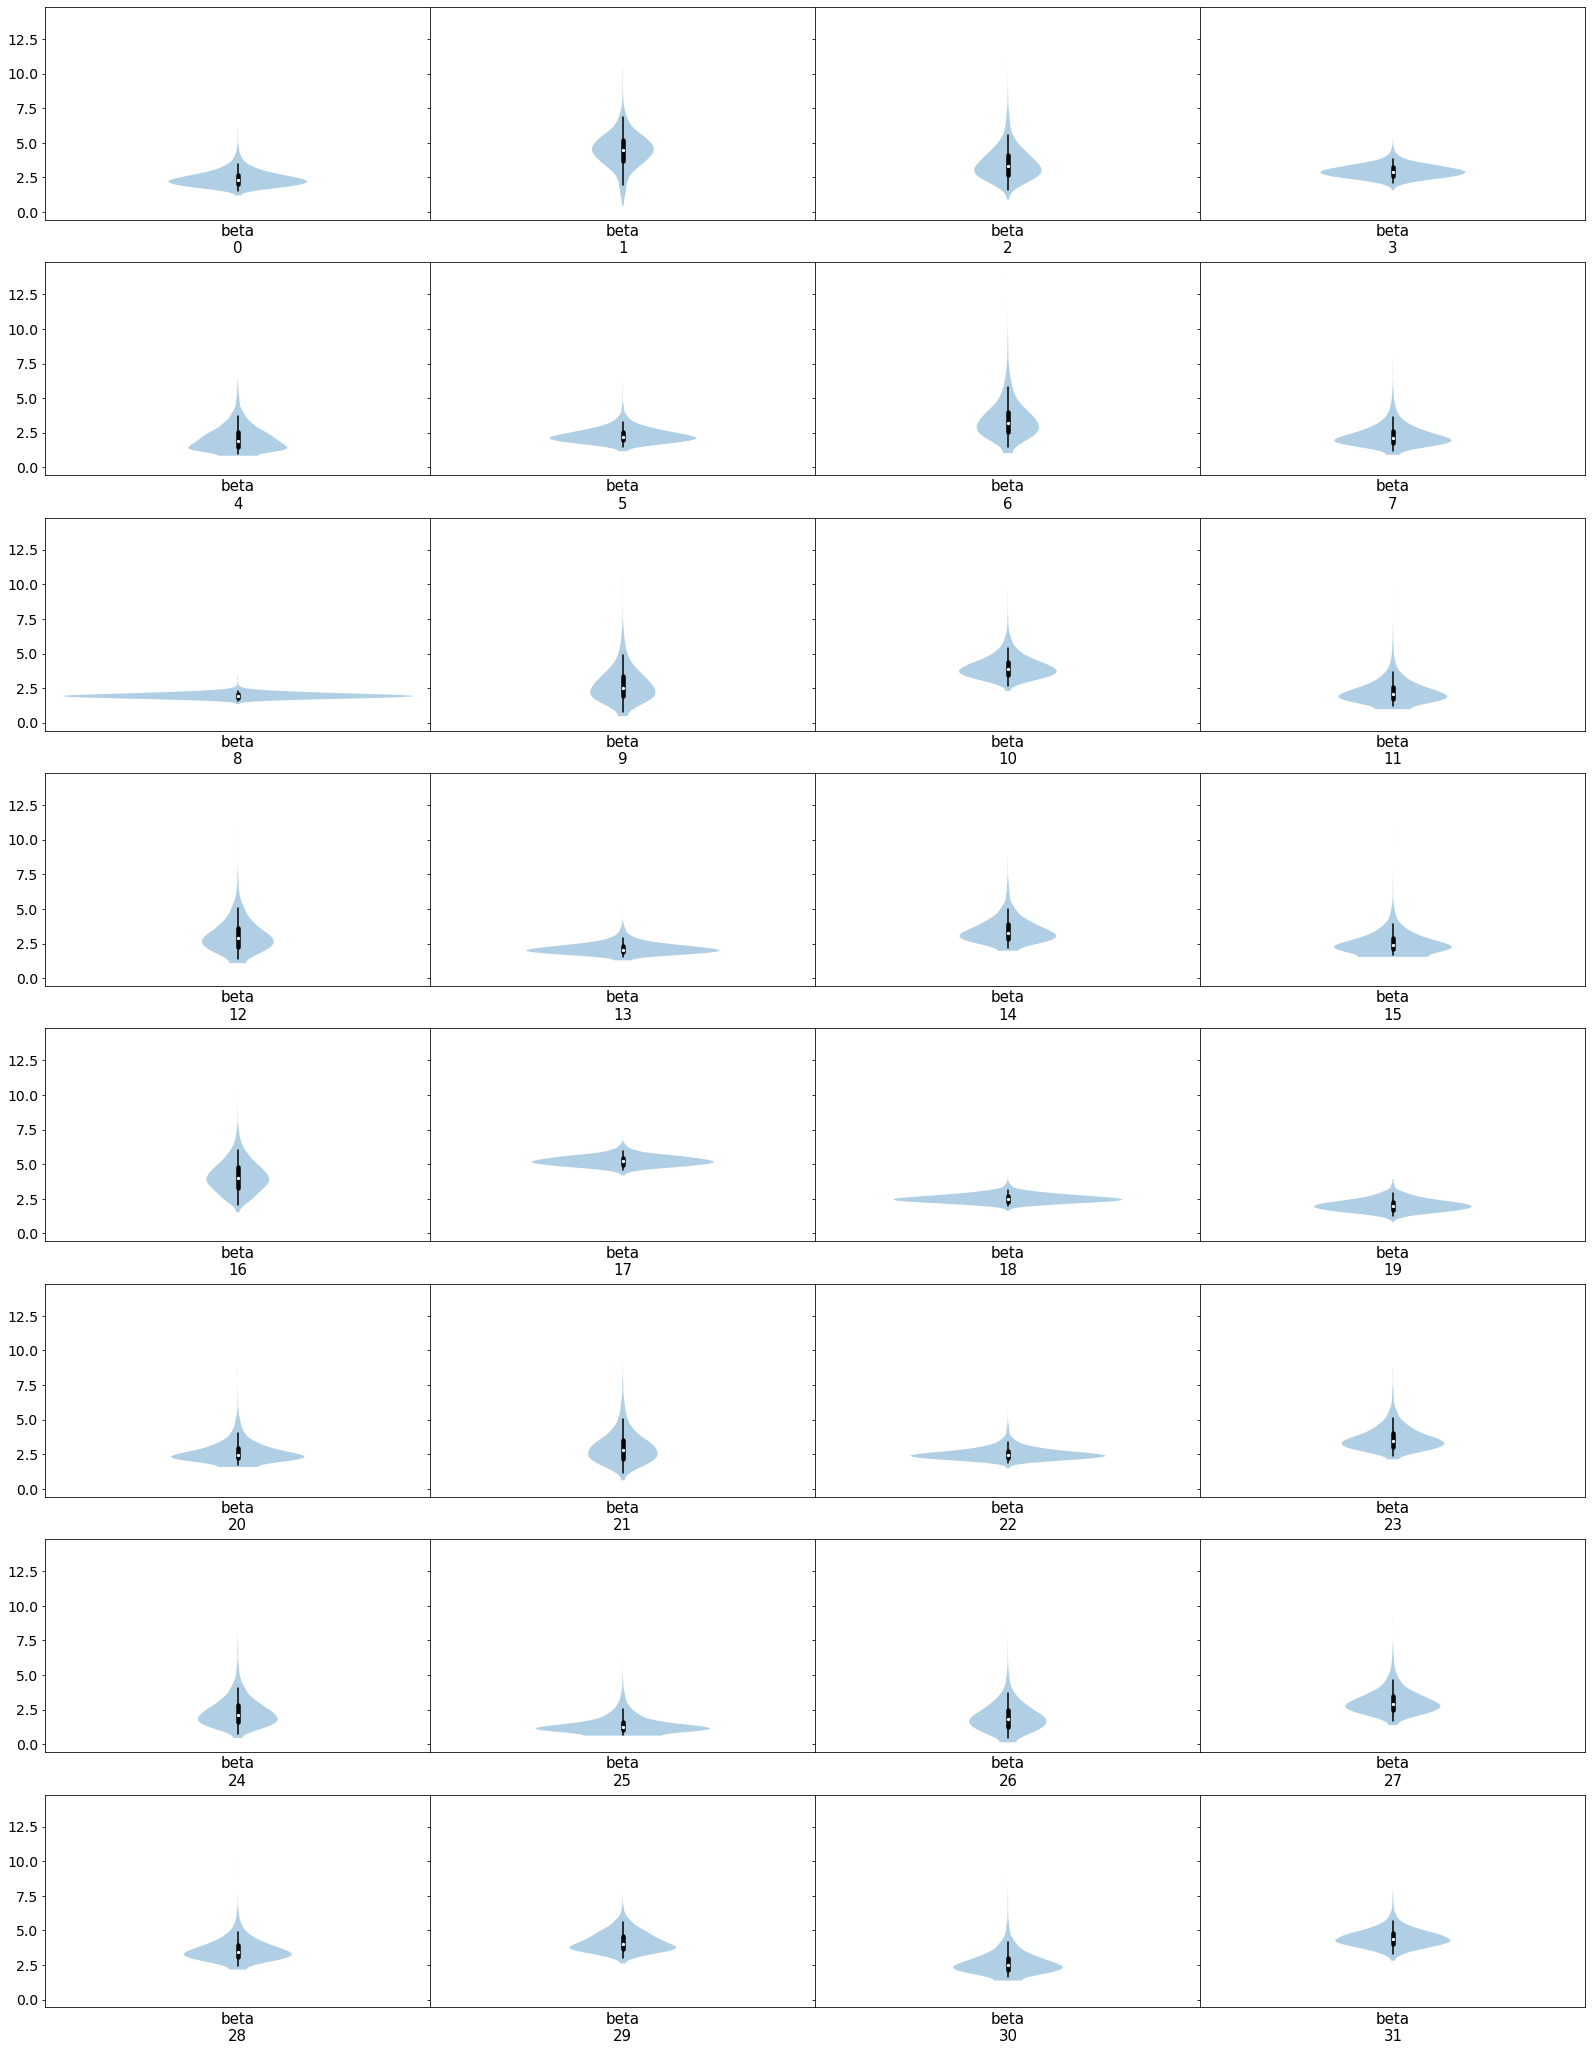

In [83]:
az.plot_violin(standard_basic_fit.posterior.beta)

In [7]:
##WAIC

def softmax(x,beta):
    
    return np.exp(beta*x)/np.sum(np.exp(beta*x))

# calculate pointwise log-likelihood (ie for each datapoint)


#run chosen option through softmax equation, beta*V? with categorical logit PDF? not sure if I then take the maximum of this??

#then need to actually calculate WAIC

#point estimates and standard errors of the expected log pointwise predictive density 

#multiplied by -2
